In [237]:
#############################################################################
# Light curves download and Audio files generation for a mockup application #
# Exoplanet                                                                 #
# Hesperia Cluster team, at Madrid NASA Space Apps Challenge - 2022         #
#############################################################################

# Kepler & TESS time series analysis, by Lightkurve Collaboration
import lightkurve as lk

# Scatterplot Sonification Package, by Locke Patton and Emily Levesque
from sonipy.sonify import SonifyTool

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [516]:
# ***** EXTRINSIC ECLIPSING EXOPLANET TRANSIT ******

# TRAPPIST-1
star_id = 'Trappist-1'

# Query Kepler/K2 and download light_curve
pixel_file = lk.search_targetpixelfile("Trappist-1")[1].download()
light_curve = pixel_file.to_lightcurve(method="pld").remove_outliers().flatten() # Photometry method: Pixel Level Decorrelation
# Compute period
period = light_curve.to_periodogram("bls").period_at_max_power # method 'boxleastsquares'
print("Period: " + str(period))


Period: 1.5110372927644626 d


In [517]:
# Fold periods to get a curve with more points
light_curve_fold = light_curve.fold(period)


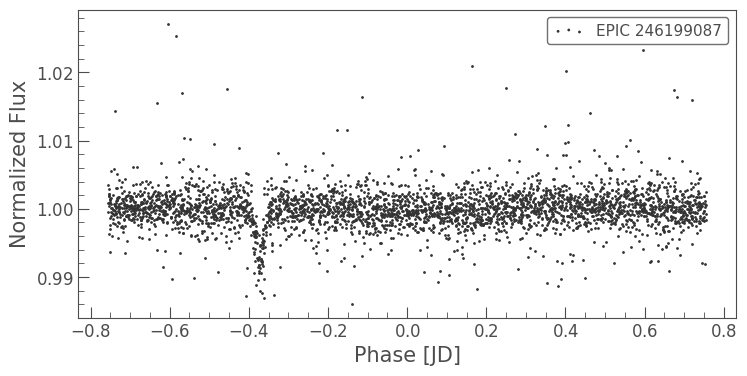

In [518]:
light_curve_fold.scatter()
plt.show()


In [519]:
# Get axes (normalized flux) and start time at 0
flux_axis = light_curve_fold.flux.value
time_axis = light_curve_fold.time.value


In [520]:
# Get minimum flux
min_flux = flux_axis.min()
print(min_flux)


0.9861215109899869


In [521]:
# Estimate trasit times from the graph (should be done automatically)
# And generate a square curve for the visualization app
transit_mask = light_curve_fold.create_transit_mask(transit_time=-0.37, period=period, duration=0.1)
transit_mask_flux = [None] * len(transit_mask)


In [522]:
# Fit transit mask
for i in range(len(transit_mask)):
    if transit_mask[i]==True:
        transit_mask_flux[i]=min_flux
    else:
        transit_mask_flux[i]=1


In [523]:
# Normalize time
time_axis = time_axis - time_axis[0]
time_axis = time_axis/time_axis.max()


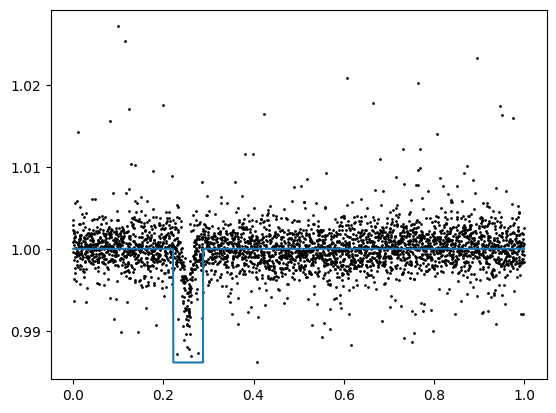

In [524]:
plt.plot(time_axis, transit_mask_flux)
plt.scatter(time_axis, flux_axis, s=1, c='black')
plt.show()


In [525]:
# Scale fluxes for representation
flux_axis_norm = (flux_axis/np.max(flux_axis))*20-19
transit_mask_flux_norm = (transit_mask_flux/np.max(flux_axis))*20-19


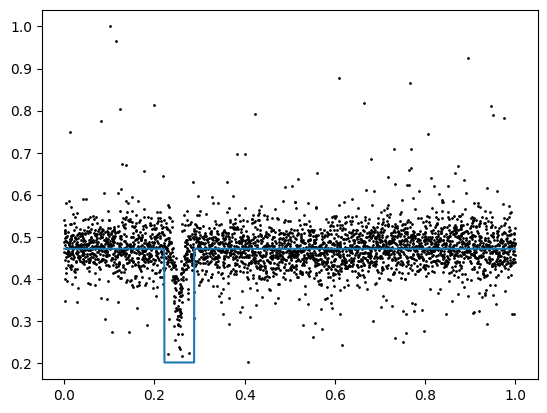

In [526]:
plt.plot(time_axis, transit_mask_flux_norm)
plt.scatter(time_axis, flux_axis_norm, s=1, c='black')
plt.show()


In [527]:
# Get during-transit time values
min_line = np.where(transit_mask_flux_norm == transit_mask_flux_norm.min())[0]


In [529]:
# Create polynomic model to smooth transit
model3 = np.poly1d(np.polyfit(time_axis, transit_mask_flux_norm, 24))


c:\Users\AntonioOrtega\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [530]:
# Add transit to model array
for i in range(len(transit_mask_flux_norm)):
    if i > min_line[0]-150 and i < min_line[-1]+150:
        transit_mask_flux_norm[i]=model3(time_axis)[i]


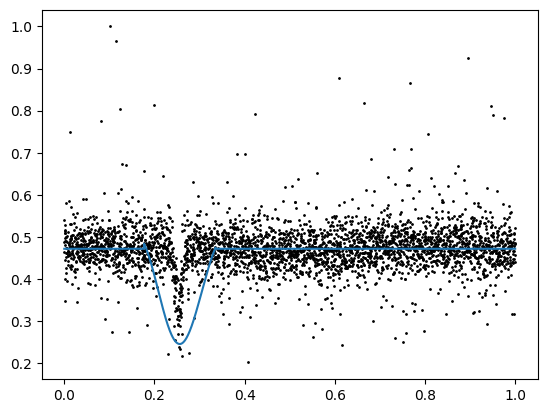

In [531]:
plt.plot(time_axis, transit_mask_flux_norm)
plt.scatter(time_axis, flux_axis_norm, s=1, c='black')
plt.show()


In [532]:
# Save the curve (time and flux normalised) to a CSV file
df = pd.DataFrame({"time" : time_axis, "flux" : flux_axis_norm})
df.to_csv("exoplanet_TRAPPITS1.csv", index=False)

df2 = pd.DataFrame({"time" : time_axis, "flux" : transit_mask_flux_norm})
df2.to_csv("exoplanet_TRAPPITS1_model.csv", index=False)


In [533]:
# Generate WAV adio file from the curve, 5 seconds duration

C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}
duration_args = {
  'time_total' : 5000, # ms
}

Tone = SonifyTool(time_axis, flux_axis_norm, duration_args = duration_args, frequency_args = frequency_args)
Tone.save(filename='exoplanet_TRAPPITS1.wav')


c:\Users\AntonioOrtega\AppData\Local\Programs\Python\Python310\lib\site-packages\sonipy\thinkdsp.py:733: UserWarning: Can't add these waveforms; their time arrays don't line up.
  warnings.warn(


multitones created
Writing .\tones/exoplanet_TRAPPITS1.wav
Saved multitone as .\tones/exoplanet_TRAPPITS1.wav.
